In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import zscore

In [2]:
data = pd.read_csv('/Users/savithakamalon/Documents/PracticalML/Project1/diabetesprediction/diabetes.csv')

In [3]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
0                        0.63   50        1  
1                  

In [4]:
#checking null values
print(data.isnull().values.any())

False


<AxesSubplot:>

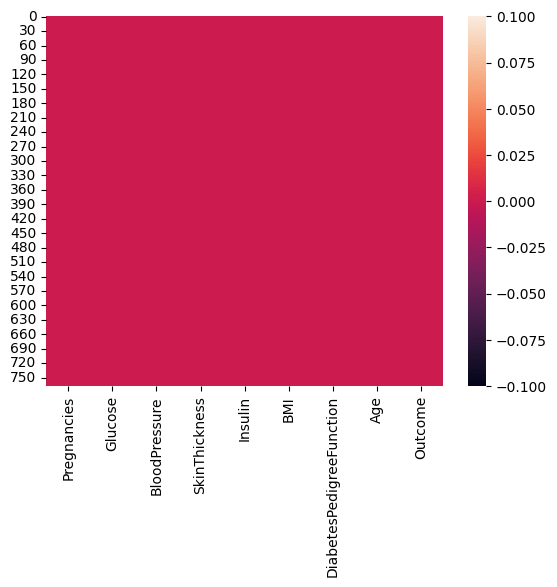

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.duplicated().sum()

0

In [7]:
cor = data.corr()

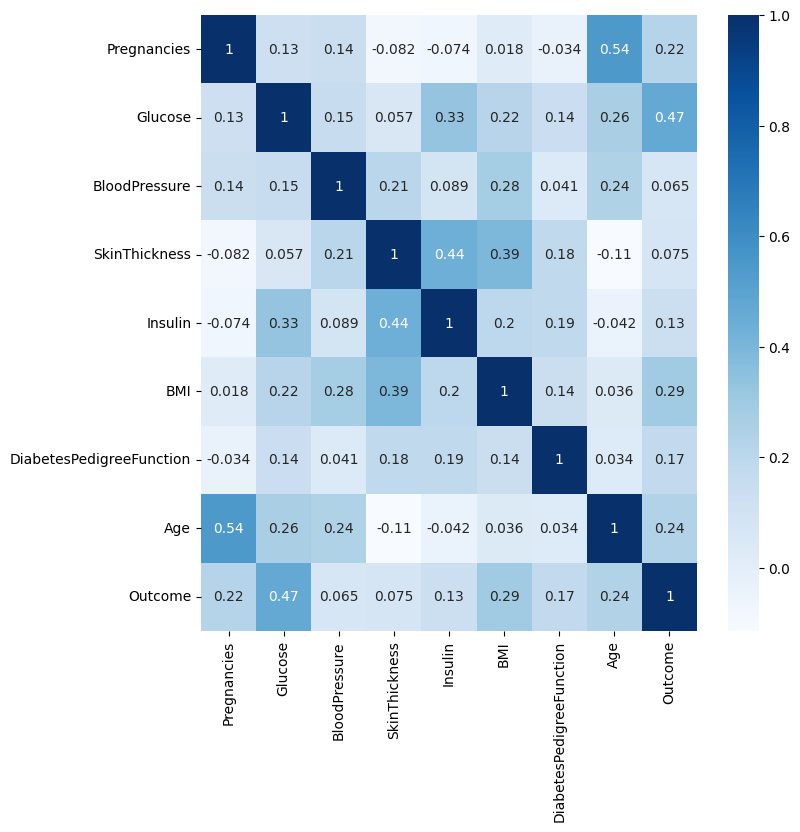

In [8]:
top_corr_features = cor.index
plt.figure(figsize=(8,8))
g = sns.heatmap(data[top_corr_features].corr(),annot=True, cmap='Blues')

In [9]:
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [10]:
#checking data is balanced or not
diabetes_true_count = len(data.loc[data['Outcome']==1])
diabetes_false_count = len(data.loc[data['Outcome']==0])

In [11]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

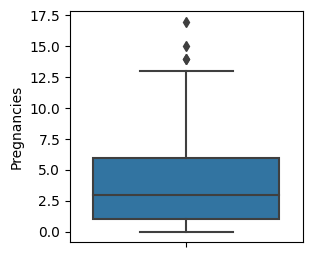

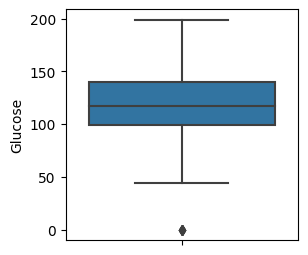

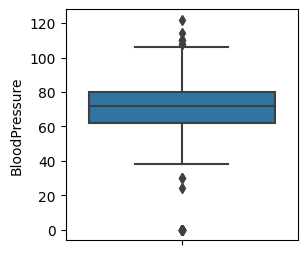

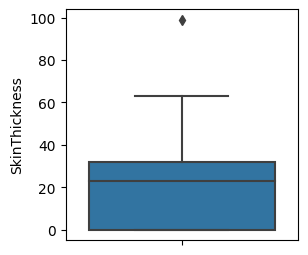

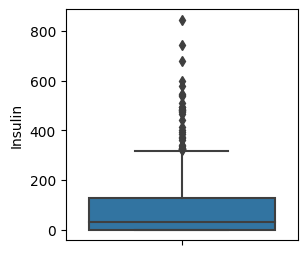

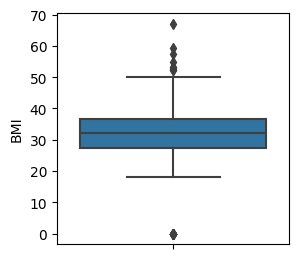

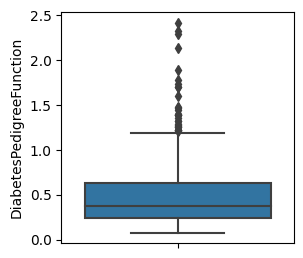

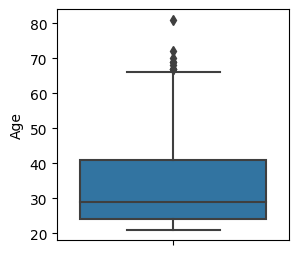

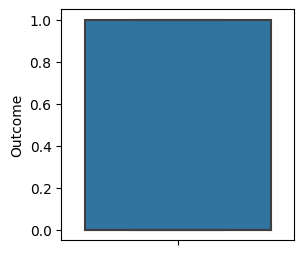

In [12]:
# look the outlier data
for col in data.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=data[col])
    plt.show()

In [13]:

print("number of rows missing Glucose: ",data[data['Glucose']==0].shape[0])
print("number of rows missing BloodPressure: ",data[data['BloodPressure']==0].shape[0])
print("number of rows missing SkinThickness: ",data[data['SkinThickness']==0].shape[0])
print("number of rows missing Insulin: ",data[data['Insulin']==0].shape[0])
print("number of rows missing BMI: ",data[data['BMI']==0].shape[0])
print("number of rows missing DiabetesPedigreeFunction: ",data[data['DiabetesPedigreeFunction']==0].shape[0])
print("number of rows missing Age: ",data[data['Age']==0].shape[0])

number of rows missing Glucose:  5
number of rows missing BloodPressure:  35
number of rows missing SkinThickness:  227
number of rows missing Insulin:  374
number of rows missing BMI:  11
number of rows missing DiabetesPedigreeFunction:  0
number of rows missing Age:  0


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

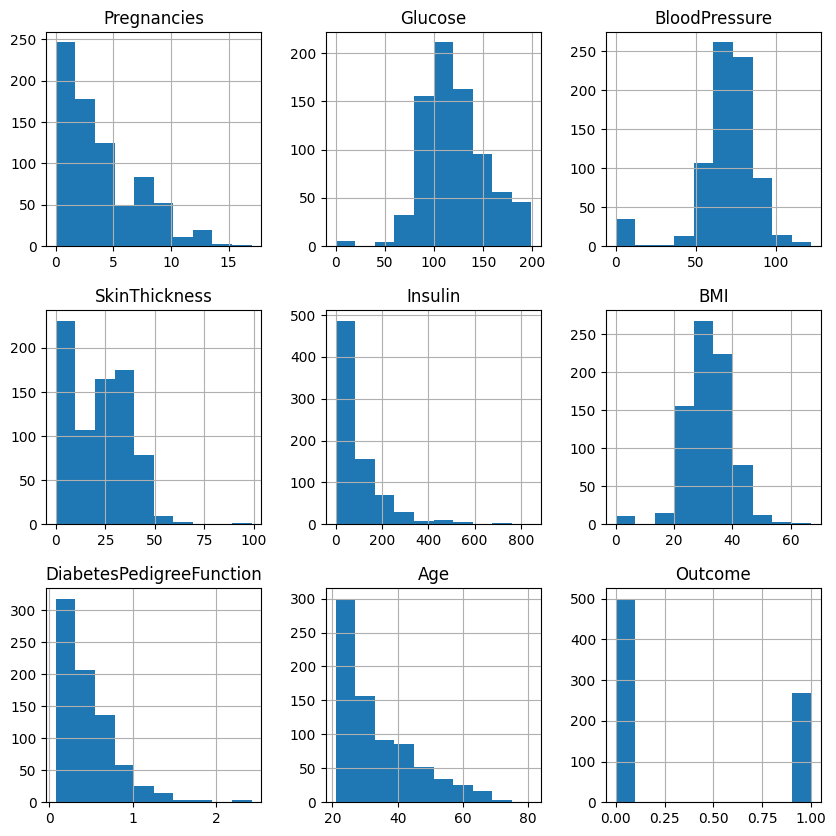

In [14]:
data.hist(bins=10,figsize=(10,10))


In [15]:
#replacing 0 values with mean/median 
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35,30.50,33.60,0.63,50,1
1,1,85.00,66.00,29,30.50,26.60,0.35,31,0
2,8,183.00,64.00,23,30.50,23.30,0.67,32,1
3,1,89.00,66.00,23,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35,168.00,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27,30.50,36.80,0.34,27,0
765,5,121.00,72.00,23,112.00,26.20,0.24,30,0
766,1,126.00,60.00,23,30.50,30.10,0.35,47,1


In [17]:
## Outliers

# Z-Score
z = np.abs(zscore(data))

threshold = 3
data = data[(z < 3).all(axis=1)]

# IQR score
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35,30.50,33.60,0.63,50,1
1,1,85.00,66.00,29,30.50,26.60,0.35,31,0
2,8,183.00,64.00,23,30.50,23.30,0.67,32,1
3,1,89.00,66.00,23,94.00,28.10,0.17,21,0
5,5,116.00,74.00,23,30.50,25.60,0.20,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.00,62.00,23,30.50,22.50,0.14,33,0
764,2,122.00,70.00,27,30.50,36.80,0.34,27,0
765,5,121.00,72.00,23,112.00,26.20,0.24,30,0
766,1,126.00,60.00,23,30.50,30.10,0.35,47,1


In [19]:
IQR

Pregnancies                 5.00
Glucose                    39.00
BloodPressure              16.00
SkinThickness               9.00
Insulin                    89.50
BMI                         8.70
DiabetesPedigreeFunction    0.36
Age                        16.00
Outcome                     1.00
dtype: float64

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,615.00,615.00,615.00,615.00,615.00,615.00,615.00,615.00,615.00
mean,3.77,117.22,71.46,25.98,69.32,31.53,0.41,32.04,0.31
std,3.20,28.12,10.68,7.40,55.96,6.13,0.23,10.40,0.46
min,0.00,44.00,44.00,10.00,15.00,18.20,0.08,21.00,0.00
25%,1.00,97.00,64.00,23.00,30.50,27.15,0.24,24.00,0.00
50%,3.00,113.00,70.00,23.00,30.50,31.60,0.34,28.00,0.00
75%,6.00,132.00,78.00,31.00,100.00,35.30,0.56,39.00,1.00
max,13.00,196.00,104.00,45.00,250.00,48.30,1.14,64.00,1.00


In [21]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6   148.00          72.00             35    30.50 33.60   
1              1    85.00          66.00             29    30.50 26.60   
2              8   183.00          64.00             23    30.50 23.30   
3              1    89.00          66.00             23    94.00 28.10   
5              5   116.00          74.00             23    30.50 25.60   
..           ...      ...            ...            ...      ...   ...   
762            9    89.00          62.00             23    30.50 22.50   
764            2   122.00          70.00             27    30.50 36.80   
765            5   121.00          72.00             23   112.00 26.20   
766            1   126.00          60.00             23    30.50 30.10   
767            1    93.00          70.00             31    30.50 30.40   

     DiabetesPedigreeFunction  Age  
0                        0.63   50  
1                        0.35   31  


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(492, 8)
(123, 8)
(492,)
(123,)


In [24]:
###  Standardization

scalar = StandardScaler()

In [25]:
X_train = scalar.fit_transform(X_train)

In [26]:
X_test = scalar.transform(X_test)

In [27]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models.sort_values('Accuracy',ascending =False)

100%|██████████| 29/29 [00:00<00:00, 33.22it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.80,0.73,0.73,0.80,0.01
RandomForestClassifier,0.80,0.73,0.73,0.80,0.10
SVC,0.79,0.73,0.73,0.79,0.02
NuSVC,0.79,0.73,0.73,0.79,0.02
RidgeClassifier,0.78,0.71,0.71,0.78,0.01
PassiveAggressiveClassifier,0.78,0.67,0.67,0.76,0.01
RidgeClassifierCV,0.78,0.70,0.70,0.77,0.01
ExtraTreesClassifier,0.77,0.71,0.71,0.77,0.08
CalibratedClassifierCV,0.77,0.69,0.69,0.77,0.04


###Random Forest

In [28]:
# define models and parameters
modelrf = RandomForestClassifier()
n_estimators = [ 200, 250,300,350,400,500,1000]
max_features = ['sqrt', 'log2']
max_depth = [8,10, 12,15,18]
min_samples_split = [2, 5, 8,10,12]
min_samples_leaf=[ 2, 4, 6]

In [29]:
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=modelrf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [30]:
#best_model = 
grid_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
rf_classifier = grid_search.best_estimator_

In [ ]:
rf_classifier

In [ ]:
grid_search.best_score_

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
#rf_pred=best_model.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
y_pred-y_test

In [ ]:
count = np.count_nonzero(y_pred-y_test)
count

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
#print("\n F1:\n",f1_score(y_test,knn_pred))
#print("\n Precision score is:\n",precision_score(y_test,knn_pred))
#print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

In [ ]:
# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


In [ ]:
# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC score:", auc_score)

In [ ]:
scores=cross_val_score(rf_classifier,X_train,y_train.ravel(),cv=10)

In [ ]:
scores

In [ ]:
scores.mean()

In [ ]:
new_data = {'Pregnancies': 1, 'Glucose':89, 'BloodPressure': 66, 'SkinThickness':23, 'Insulin': 94
, 'BMI': 28.1, 'DiabetesPedigreeFunction': 0.167, 'Age': 21}


In [ ]:

# Convert the new data point to a Pandas DataFrame
X_new = pd.DataFrame.from_dict([new_data])




In [ ]:
X_new

In [ ]:
# Scale the features in the new data using a StandardScaler object
X_new_scaled = scalar.transform(X_new)



In [ ]:
X_new_scaled

In [ ]:
prediction=rf_classifier.predict(X_new_scaled)
prediction